# PyGreentea Network Generator 

### Load the dependencies

In [1]:
%matplotlib inline

from __future__ import print_function
import h5py
import numpy as np
from numpy import float32, int32, uint8, dtype
import sys
import matplotlib.pyplot as plt


pygt_path = '../PyGreentea'
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), pygt_path))

import math

import PyGreentea as pygt

### Load the default network template

In [2]:
netconf = pygt.netgen.NetConf()

### Set the memory limits for the GPU

In [3]:
# We use cuDNN, so:
netconf.ignore_conv_buffer = True
# 4 GB total, ignore convolution buffer. Let's keep 0.5 GB for implementation dependent buffers.
netconf.mem_global_limit = 3.5 * 1024 * 1024 * 1024
# 4 GB convolution buffer limit
netconf.mem_buf_limit = 3.5 * 1024 * 1024 * 1024

### Explore possible network input/output shapes for the chosen settings

In [4]:
# We test memory usage for training
mode = pygt.netgen.caffe_pb2.TRAIN
# The minimum we're interested in
shape_min = [100,100,100]
# And maximum
shape_max = [200,200,200]
# We want Z and Y to be independent, but X == Y
constraints = [None, lambda x: x[0], lambda x: x[1]]

netconf.unet_downsampling_strategy=[[3,3,3],[3,3,3],[2,2,2]]

# Compute (can be quite intensive)
inshape, outshape, fmaps = pygt.netgen.compute_valid_io_shapes(netconf,mode,shape_min,shape_max,constraints=constraints)

-- Invalid: [100] => []
-- Invalid: [101] => []
-- Invalid: [102] => []
-- Invalid: [103] => []
-- Invalid: [104] => []
-- Invalid: [105] => []
-- Invalid: [106] => []
-- Invalid: [107] => []
-- Invalid: [108] => []
-- Invalid: [109] => []
-- Invalid: [110] => []
-- Invalid: [111] => []
-- Invalid: [112] => []
-- Invalid: [113] => []
-- Invalid: [114] => []
-- Invalid: [115] => []
-- Invalid: [116] => []
-- Invalid: [117] => []
-- Invalid: [118] => []
-- Invalid: [119] => []
-- Invalid: [120] => []
-- Invalid: [121] => []
-- Invalid: [122] => []
-- Invalid: [123] => []
-- Invalid: [124] => []
-- Invalid: [125] => []
-- Invalid: [126] => []
-- Invalid: [127] => []
-- Invalid: [128] => []
-- Invalid: [129] => []
-- Invalid: [130] => []
-- Invalid: [131] => []
-- Invalid: [132] => []
-- Invalid: [133] => []
-- Invalid: [134] => []
-- Invalid: [135] => []
-- Invalid: [136] => []
-- Invalid: [137] => []
-- Invalid: [138] => []
-- Invalid: [139] => []
-- Invalid: [140] => []
-- Invalid: [141

### Visualization

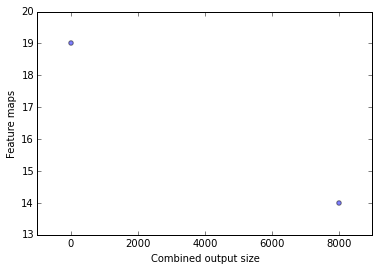

In [5]:
plt.figure()
# Combined output size versus feature map count
plt.scatter([x[0]*x[1]*x[2] for x in outshape], fmaps, alpha = 0.5)
plt.ylabel('Feature maps')
plt.xlabel('Combined output size')
plt.show()

### Pick parameters, actually generate and store the network

In [6]:
netconf.input_shape = inshape[0]
netconf.output_shape = outshape[0]
netconf.fmap_start = fmaps[0]

print ('Input shape: %s' % netconf.input_shape)
print ('Output shape: %s' % netconf.output_shape)
print ('Feature maps: %s' % netconf.fmap_start)

netconf.loss_function = "euclid"
train_net_conf_euclid, test_net_conf = pygt.netgen.create_nets(netconf)
netconf.loss_function = "malis"
train_net_conf_malis, test_net_conf = pygt.netgen.create_nets(netconf)

with open('net_train_euclid.prototxt', 'w') as f:
    print(train_net_conf_euclid, file=f)
with open('net_train_malis.prototxt', 'w') as f:
    print(train_net_conf_malis, file=f)
with open('net_test.prototxt', 'w') as f:
    print(test_net_conf, file=f)

Input shape: [178, 178, 178]
Output shape: [2, 2, 2]
Feature maps: 19
f: 1 w: [178, 178, 178] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 19 w: [176, 176, 176] d: [1, 1, 1]
WM: 2052
CM: 609093216
AM: 828669952
f: 19 w: [174, 174, 174] d: [1, 1, 1]
WM: 38988
CM: 11187044352
AM: 800739648
f: 19 w: [58, 58, 58] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 57 w: [56, 56, 56] d: [1, 1, 1]
WM: 116964
CM: 400369824
AM: 80080896
f: 57 w: [54, 54, 54] d: [1, 1, 1]
WM: 350892
CM: 1081092096
AM: 71803584
f: 57 w: [18, 18, 18] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 171 w: [16, 16, 16] d: [1, 1, 1]
WM: 1052676
CM: 35901792
AM: 5603328
f: 171 w: [14, 14, 14] d: [1, 1, 1]
WM: 3158028
CM: 75644928
AM: 3753792
f: 171 w: [7, 7, 7] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 513 w: [5, 5, 5] d: [1, 1, 1]
WM: 9474084
CM: 6334524
AM: 513000
f: 513 w: [3, 3, 3] d: [1, 1, 1]
WM: 28422252
CM: 6925500
AM: 110808
f: 513 w: [6, 6, 6] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
f: 171 w: [6, 6, 6] d: [1, 1, 1]
WM: 350892
CM: 3545856
AM: 0
f: 342 w: [6, 6, 6] d: